## Googleドライブのマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1>0. データ表示</h1>

In [2]:
#from モジュール名 import クラス名（もしくは関数名や変数名）
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#matplotlibをinlineで表示するためのおまじない (plt.show()しなくていい)
%matplotlib inline

以下では，Googleドライブのマイドライブ直下にstudy_ai_mlフォルダを置くことを仮定しています．必要に応じて，パスを変更してください。

In [3]:
# titanic data csvファイルの読み込み
titanic_df = pd.read_csv('/content/drive/My Drive/Study-AI/data/titanic_train.csv')

In [4]:
# ファイルの先頭部を表示し、データセットを確認する
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h1>1. ロジスティック回帰</h1>
<h3>不要なデータの削除・欠損値の補完</h3>

In [5]:
#予測に不要と考える説明変数をドロップ (本当はここの情報もしっかり使うべきだと思っています)
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

#一部カラムをドロップしたデータを表示
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
#nullを含んでいる行を表示
titanic_df[titanic_df.isnull().any(1)].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
29,0,3,male,NaN,0,0,7.8958,S
31,1,1,female,NaN,1,0,146.5208,C
32,1,3,female,NaN,0,0,7.7500,Q
36,1,3,male,NaN,0,0,7.2292,C
42,0,3,male,NaN,0,0,7.8958,C


In [7]:
#Ageカラムのnullを中央値で補完
titanic_df['AgeFill'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

#再度nullを含んでいる行を表示 (Ageがnullの行は、AgeFillが中央値で補完されている)
titanic_df[titanic_df.isnull().any(1)]

#titanic_df.dtypes

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill
5,0,3,male,NaN,0,0,8.4583,Q,29.699118
17,1,2,male,NaN,0,0,13.0000,S,29.699118
19,1,3,female,NaN,0,0,7.2250,C,29.699118
26,0,3,male,NaN,0,0,7.2250,C,29.699118
28,1,3,female,NaN,0,0,7.8792,Q,29.699118
...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,29.699118
863,0,3,female,NaN,8,2,69.5500,S,29.699118
868,0,3,male,NaN,0,0,9.5000,S,29.699118
878,0,3,male,NaN,0,0,7.8958,S,29.699118


In [8]:
#Ageがnullでない行は、AgeFill＝Ageとなっている
titanic_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill
0,0,3,male,22.0,1,0,7.2500,S,22.0
1,1,1,female,38.0,1,0,71.2833,C,38.0
2,1,3,female,26.0,0,0,7.9250,S,26.0
3,1,1,female,35.0,1,0,53.1000,S,35.0
4,0,3,male,35.0,0,0,8.0500,S,35.0


<h1>1. ロジスティック回帰</h1>
<h3>実装(チケット価格から生死を判別)</h3>

In [9]:
#運賃だけのリストを作成（全ての行のFareの列を抽出）
data1 = titanic_df.loc[:, ["Fare"]].values

In [10]:
#生死フラグのみのリストを作成
label1 =  titanic_df.loc[:,["Survived"]].values

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model=LogisticRegression()

In [13]:
model.fit(data1, label1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [14]:
# チケット価格のデータを確認
print(data1.min())
print(data1.max())
print(data1.mean())

0.0
512.3292
32.204207968574636


In [15]:
model.predict([[62]])

array([1])

In [16]:
# クラス0と1に分類される確率
model.predict_proba([[62]]) #チケット価格による分類では、このあたりが生死の分かれ目

array([[0.49978123, 0.50021877]])

In [17]:
# 決定関数値（絶対値が大きいほど識別境界から離れている）
X_test_value = model.decision_function(data1) 
print(X_test_value[0])

-0.8311421633480188


In [18]:
import numpy as np

# シグモイド関数の定義
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

In [19]:
# 決定関数値をシグモイド関数で確率に変換
X_test_prob = sigmoid(X_test_value) 
print(X_test_prob[0])

0.30340361991840836


In [20]:
print (model.intercept_)

print (model.coef_)

[-0.94131796]
[[0.01519666]]


No handles with labels found to put in legend.


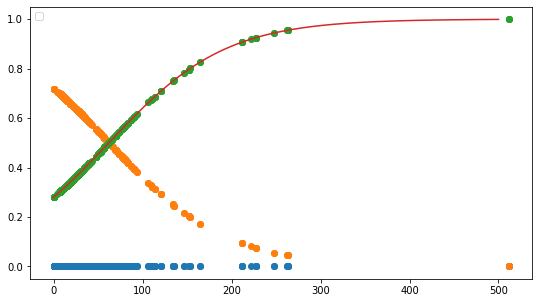

In [21]:
w_0 = model.intercept_[0]
w_1 = model.coef_[0,0]

# def normal_sigmoid(x):
#     return 1 / (1+np.exp(-x))

def sigmoid(x):
    return 1 / (1+np.exp(-(w_1*x+w_0)))

# チケット価格ごとの推定生存率を描画
x_range = np.linspace(-1, 500, 3000)

plt.figure(figsize=(9,5))
#plt.xkcd()
plt.legend(loc=2)


plt.plot(data1,np.zeros(len(data1)), 'o')
plt.plot(data1, model.predict_proba(data1), 'o')
plt.plot(x_range, sigmoid(x_range), '-')

<h2>考察</h2>

- ロジスティック回帰はシグモイド関数による学習であり、学習するパラメータはシグモイド関数曲線の切片と係数にあたる。
- 2値分類のため、反対のクラスは線対称の曲線になる。

<h1>1. ロジスティック回帰</h1>
<h3>実装(2変数から生死を判別)</h3>

In [22]:
#AgeFillの欠損値を埋めたので
#titanic_df = titanic_df.drop(['Age'], axis=1)

In [23]:
# カテゴリカル変数である性別をone-hot形式にする
titanic_df['Gender'] = titanic_df['Sex'].map({'female': 0, 'male': 1}).astype(int)

In [24]:
titanic_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill,Gender
0,0,3,male,22.0,1,0,7.2500,S,22.0,1
1,1,1,female,38.0,1,0,71.2833,C,38.0,0
2,1,3,female,26.0,0,0,7.9250,S,26.0,0


In [25]:
# 説明変数を結合する（チケットクラス＋性別、数字が小さいほど生存率が高いと仮定）
titanic_df['Pclass_Gender'] = titanic_df['Pclass'] + titanic_df['Gender']

In [26]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill,Gender,Pclass_Gender
0,0,3,male,22.0,1,0,7.2500,S,22.0,1,4
1,1,1,female,38.0,1,0,71.2833,C,38.0,0,1
2,1,3,female,26.0,0,0,7.9250,S,26.0,0,3
3,1,1,female,35.0,1,0,53.1000,S,35.0,0,1
4,0,3,male,35.0,0,0,8.0500,S,35.0,1,4


In [27]:
# 使用しない説明変数を削除する
titanic_df = titanic_df.drop(['Pclass', 'Sex', 'Gender','Age'], axis=1)

In [28]:
titanic_df.head()

,Survived,SibSp,Parch,Fare,Embarked,AgeFill,Pclass_Gender
0,0,1,0,7.2500,S,22.0,4
1,1,1,0,71.2833,C,38.0,1
2,1,0,0,7.9250,S,26.0,3
3,1,1,0,53.1000,S,35.0,1
4,0,0,0,8.0500,S,35.0,4


In [29]:
# 重要だよ！！！
# 境界線の式
#   w_1・x + w_2・y + w_0 = 0
#   ⇒ y = (-w_1・x - w_0) / w_2
 
# # 境界線 プロット
# plt.plot([-2,2], map(lambda x: (-w_1 * x - w_0)/w_2, [-2,2]))
 
# # データを重ねる
# plt.scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], c='red', marker='x', label='train 0')
# plt.scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], c='blue', marker='x', label='train 1')
# plt.scatter(X_test_std[y_test==0, 0], X_test_std[y_test==0, 1], c='red', marker='o', s=60, label='test 0')
# plt.scatter(X_test_std[y_test==1, 0], X_test_std[y_test==1, 1], c='blue', marker='o', s=60, label='test 1')

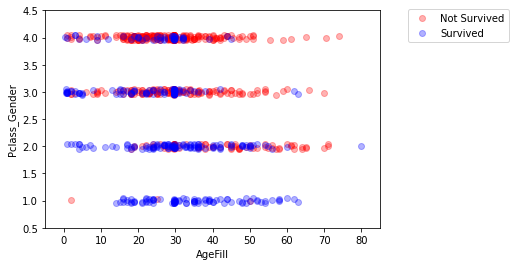

In [30]:
np.random.seed = 0

# 描画範囲を設定
xmin, xmax = -5, 85
ymin, ymax = 0.5, 4.5

# 生死それぞれのアレイを作成
index_survived = titanic_df[titanic_df["Survived"]==0].index
index_notsurvived = titanic_df[titanic_df["Survived"]==1].index

# カラーマップを設定
from matplotlib.colors import ListedColormap
fig, ax = plt.subplots()
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# 生存者について、年齢とチケット＋性別の関係を描画
sc = ax.scatter(titanic_df.loc[index_survived, 'AgeFill'],
                titanic_df.loc[index_survived, 'Pclass_Gender']+(np.random.rand(len(index_survived))-0.5)*0.1,
                color='r', label='Not Survived', alpha=0.3)
sc = ax.scatter(titanic_df.loc[index_notsurvived, 'AgeFill'],
                titanic_df.loc[index_notsurvived, 'Pclass_Gender']+(np.random.rand(len(index_notsurvived))-0.5)*0.1,
                color='b', label='Survived', alpha=0.3)
ax.set_xlabel('AgeFill')
ax.set_ylabel('Pclass_Gender')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.legend(bbox_to_anchor=(1.4, 1.03))

## 考察
- 年齢が若く、チケットクラスが良く、女性の方が、全体的に生存者が多い傾向がわかる。
- 目的変数で色分けした上で説明変数を使って散布図を作ることで、どの説明変数が目的変数に関係するか推定することができる。


In [33]:
# 年齢と運賃だけのアレイを作成
data2 = titanic_df.loc[:, ["AgeFill", "Pclass_Gender"]].values

In [36]:
data2

array([[22.        ,  4.        ],
       [38.        ,  1.        ],
       [26.        ,  3.        ],
       ...,
       [29.69911765,  3.        ],
       [26.        ,  2.        ],
       [32.        ,  4.        ]])

In [40]:
# 生死フラグのみのアレイを作成
label2 =  titanic_df.loc[:,["Survived"]].values

In [42]:
model2 = LogisticRegression()

In [43]:
# ロジスティック回帰で学習
model2.fit(data2, label2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [44]:
# 年齢とチケット＋性別で推定
model2.predict([[10,1]])

array([1])

In [46]:
# 死亡・生存と推定する確率
model2.predict_proba([[10,1]])

array([[0.03754749, 0.96245251]])

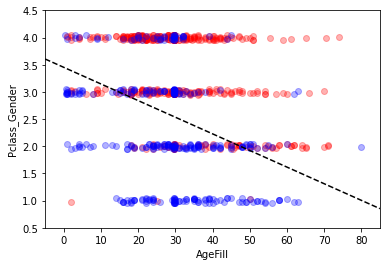

In [59]:
# 散布図に境界線を描画

# 描画設定
h = 0.02
xmin, xmax = -5, 85
ymin, ymax = 0.5, 4.5
xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))


# カラーマップを設定
fig, ax = plt.subplots()
levels = np.linspace(0, 1.0)
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#contour = ax.contourf(xx, yy, Z, cmap=cm, levels=levels, alpha=0.5)

# 散布図を描画
sc = ax.scatter(titanic_df.loc[index_survived, 'AgeFill'],
                titanic_df.loc[index_survived, 'Pclass_Gender']+(np.random.rand(len(index_survived))-0.5)*0.1,
                color='r', label='Not Survived', alpha=0.3)
sc = ax.scatter(titanic_df.loc[index_notsurvived, 'AgeFill'],
                titanic_df.loc[index_notsurvived, 'Pclass_Gender']+(np.random.rand(len(index_notsurvived))-0.5)*0.1,
                color='b', label='Survived', alpha=0.3)

ax.set_xlabel('AgeFill')
ax.set_ylabel('Pclass_Gender')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
#fig.colorbar(contour)


# メッシュグリッドを最低の次元方向に結合し、推定させた上でFlatに変換し、xxの行列に対応させて変換
# Z = model2.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Z = Z.reshape(xx.shape)

# 境界線を描画
x1 = xmin
x2 = xmax
y1 = -1*(model2.intercept_[0]+model2.coef_[0][0]*xmin)/model2.coef_[0][1]
y2 = -1*(model2.intercept_[0]+model2.coef_[0][0]*xmax)/model2.coef_[0][1]
ax.plot([x1, x2] ,[y1, y2], 'k--')

## 考察
- ロジスティック回帰で学習させた後に、学習した切片と係数を使って曲線を描画すると、クラスごとに描画した散布図に対する境界線になる。
- これが一致しなければどこかに誤りがあることを疑う。

<h1>2. モデル評価</h1>
<h3>混同行列とクロスバリデーション</h3>

In [60]:
from sklearn.model_selection import train_test_split

In [62]:
traindata1, testdata1, trainlabel1, testlabel1 = train_test_split(data1, label1, test_size=0.2)
print(traindata1.shape)
print(trainlabel1.shape)

(712, 1)
(712, 1)


In [63]:
traindata2, testdata2, trainlabel2, testlabel2 = train_test_split(data2, label2, test_size=0.2)
print(traindata2.shape)
print(trainlabel2.shape)
#本来は同じデータセットを分割しなければいけない。(簡易的に別々に分割している。)

(712, 2)
(712, 1)


In [64]:
data = titanic_df.loc[:, ].values
label =  titanic_df.loc[:,["Survived"]].values
traindata, testdata, trainlabel, testlabel = train_test_split(data, label, test_size=0.2)
print(traindata.shape)
print(trainlabel.shape)

(712, 7)
(712, 1)


In [65]:
eval_model1=LogisticRegression()
eval_model2=LogisticRegression()
#eval_model=LogisticRegression()

In [67]:
# 1：価格のみと、2：年齢とチケットクラス＋性別で、それぞれロジスティック回帰学習
predictor_eval1=eval_model1.fit(traindata1, trainlabel1).predict(testdata1)
predictor_eval2=eval_model2.fit(traindata2, trainlabel2).predict(testdata2)
#predictor_eval=eval_model.fit(traindata, trainlabel).predict(testdata)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
eval_model1.score(traindata1, trainlabel1)

0.6657303370786517

In [69]:
eval_model1.score(testdata1,testlabel1)

0.664804469273743

In [70]:
eval_model2.score(traindata2, trainlabel2)

0.7584269662921348

In [71]:
eval_model2.score(testdata2,testlabel2)

0.8268156424581006

In [73]:
# テストデータのclassification reportを表示
from sklearn import metrics
print(metrics.classification_report(testlabel1, predictor_eval1))
print(metrics.classification_report(testlabel2, predictor_eval2))

              precision    recall  f1-score   support

           0       0.66      0.96      0.78       112
           1       0.71      0.18      0.29        67

    accuracy                           0.66       179
   macro avg       0.68      0.57      0.53       179
weighted avg       0.68      0.66      0.60       179

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       113
           1       0.80      0.71      0.75        66

    accuracy                           0.83       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179



## metrics.classification_reportの内容
precision：適合率、recall：再現率、f1-score：F値（precisionとrecallの調和平均）、support：正解データ内の個数

accuracy：正解率、macro avg：マクロ平均（各ラベルの平均）、weighted avg：重み付き平均（個数で重み付けした平均）


## 考察
- （変数の取り方によるが）この例では2変数を使った回帰の方が良い精度を示している。
- classification reportを表示することで、モデルごとの精度やクラスごとの精度などを比較することができる。

In [76]:
# ラベルと予測値から混同行列を表示する
from sklearn.metrics import confusion_matrix
confusion_matrix1=confusion_matrix(testlabel1, predictor_eval1)
confusion_matrix2=confusion_matrix(testlabel2, predictor_eval2)

In [77]:
confusion_matrix1

array([[107,   5],
       [ 55,  12]])

In [78]:
confusion_matrix2

array([[101,  12],
       [ 19,  47]])

## 混同行列
(真陰性、偽陽性

偽陰性、真陽性)

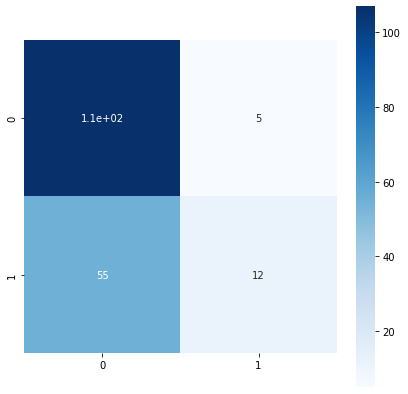

In [80]:
# 混同行列をヒートマップで描画
fig = plt.figure(figsize = (7,7))
#plt.title(title)
sns.heatmap(
    confusion_matrix1,
    vmin=None,
    vmax=None,
    cmap="Blues",
    center=None,
    robust=False,
    annot=True, fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=True, ax=None, 
    #xticklabels=columns,
    #yticklabels=columns,
    mask=None)

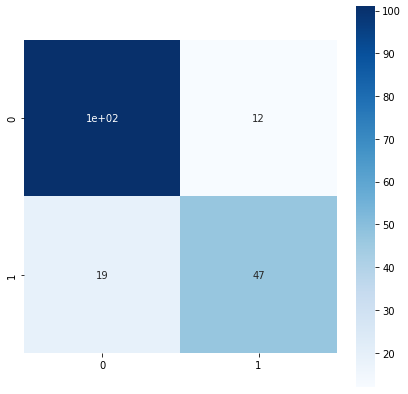

In [81]:
fig = plt.figure(figsize = (7,7))
#plt.title(title)
sns.heatmap(
    confusion_matrix2,
    vmin=None,
    vmax=None,
    cmap="Blues",
    center=None,
    robust=False,
    annot=True, fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=True, ax=None, 
    #xticklabels=columns,
    #yticklabels=columns,
    mask=None)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


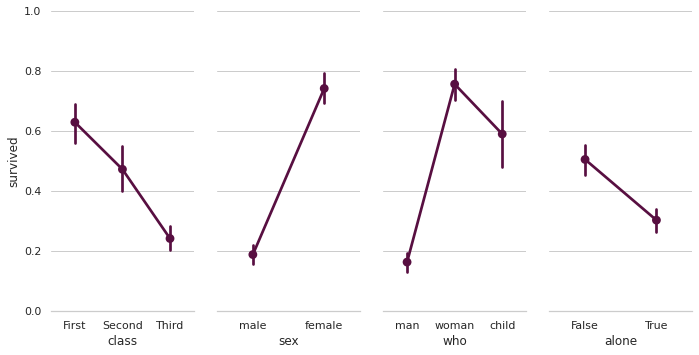

In [82]:
#Paired categorical plots

import seaborn as sns
sns.set(style="whitegrid")

# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")

# Set up a grid to plot survival probability against several variables
g = sns.PairGrid(titanic, y_vars="survived",
                 x_vars=["class", "sex", "who", "alone"],
                 size=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, color=sns.xkcd_rgb["plum"])
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


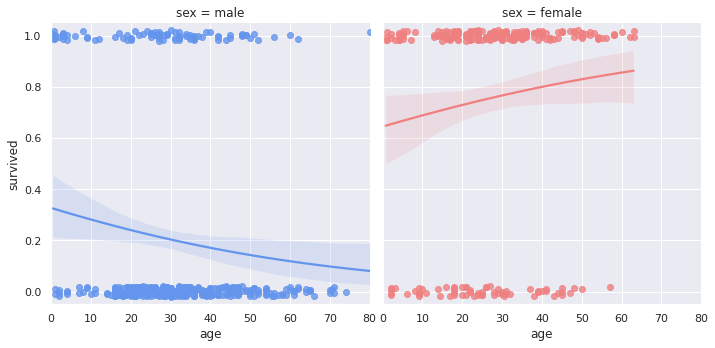

In [83]:
#Faceted logistic regression

import seaborn as sns
sns.set(style="darkgrid")

# Load the example titanic dataset
df = sns.load_dataset("titanic")

# Make a custom palette with gendered colors
pal = dict(male="#6495ED", female="#F08080")

# Show the survival proability as a function of age and sex
g = sns.lmplot(x="age", y="survived", col="sex", hue="sex", data=df,
               palette=pal, y_jitter=.02, logistic=True)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))
plt.show()